In [1]:
import os
import json

In [2]:
def cal_num_ood_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_num_ind_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ood_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ind_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def read_results(file_name, sub=10, line_num=-1, data=None):
    print(file_name)
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[line_num]
    if sub == 10:
        test_data_num = [308, 865, 974, 530, 1500, 174]
    elif sub == 50:
        test_data_num = [1811, 3530, 7370, 3122, 7500, 2096]
    elif sub == 100:
        test_data_num = [3737, 6255, 14873, 4794, 15000, 3349]
    elif sub == 150:
        test_data_num = [6266, 9436, 23170, 7693, 22500, 5353]

    if data == 'office':
        test_data_num = [2200, 2238, 2196, 1226]

    total_test_data_num = sum(test_data_num)

    acc = result['acc']
    print('accuracy:')
    print(acc)

    line_acc, total_avg_ood_acc = cal_avg_ood_acc(acc)
    # print('the ood accuracy of each class(by average):')
    # print(line_acc)
    print('the total ood accuracy(by average):')
    print(total_avg_ood_acc)

    line_acc, total_num_ood_acc = cal_num_ood_acc(test_data_num, acc)
    # print('the ood accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ood accuracy(by data number):')
    print(total_num_ood_acc)

    line_acc, total_avg_ind_acc = cal_avg_ind_acc(acc)
    # print('the ind accuracy of each class(by average):')
    # print(line_acc)
    print('the total ind accuracy(by average):')
    print(total_avg_ind_acc)

    line_acc, total_num_ind_acc = cal_num_ind_acc(test_data_num, acc)
    # print('the ind accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ind accuracy(by data number):')
    print(total_num_ind_acc)
    rounds = result['round']
    print('round:')
    print(rounds)
    times = result['total_train_time']
    print('times:')
    print(times)
    return total_avg_ood_acc, total_num_ood_acc, total_avg_ind_acc, total_num_ind_acc, rounds, times

In [9]:
file_name='./fedmoon/convnext_base_office_sub100.json'
read_results(file_name, sub=100, line_num=-2, data='office')

./fedmoon/convnext_base_office_sub100.json


IndexError: list index out of range

In [4]:
file_name='./fedavgDBE/ViT-B-32_data_sub150.json'
read_results(file_name, sub=150, line_num=-2)

./fedavgDBE/ViT-B-32_data_sub150.json
accuracy:
[[86.9933, 77.9568, 90.0432, 78.058, 23.3333, 61.3488], [84.1047, 81.6236, 89.0764, 79.2149, 21.3556, 59.107], [84.759, 75.9962, 91.4588, 77.0051, 22.4178, 61.4048], [84.1047, 77.713, 89.3483, 81.7886, 22.9289, 59.2752], [82.3013, 70.7503, 87.6349, 75.4842, 33.5911, 50.6819], [85.0622, 76.6109, 90.3625, 77.798, 23.9644, 66.6916]]
the total ood accuracy(by average):
0.6797341
the total ood accuracy(by data number):
0.6820127657287215
the total ind accuracy(by average):
0.7369116666666665
the total ind accuracy(by data number):
0.6955841328710796
round:
5
times:
986.9186367988586


(0.6797341,
 0.6820127657287215,
 0.7369116666666665,
 0.6955841328710796,
 5,
 986.9186367988586)

./ours/ViT-B-32_data_sub50.json
accuracy:
[[90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172]]
the total ood accuracy(by average):
0.8070273333333334
the total ood accuracy(by data number):
0.8106903142081875
the total ind accuracy(by average):
0.8070273333333333
the total ind accuracy(by data number):
0.7887046285736757
round:
0
times:
54.14024591445923
./ours/ViT-B-32_data_sub50_fewshot_1_kd0.0.json
accuracy:
[[90.7234, 82.2663, 92.673, 87.7643, 58.9467, 71.5649], [90.7786, 82.2946, 92.768, 87.7002, 59.0133, 71.374], [90.8338, 82.2663, 92.7137, 87.7643, 59.0533, 71.4218], [90.8338, 82.2663, 92.7408, 87.9564, 58.7867, 71.5172], [90.889, 82.2663, 92.768, 87.6361, 59.1067, 71.5172], [90.7786, 82.3229, 92.686

<Figure size 1280x960 with 0 Axes>

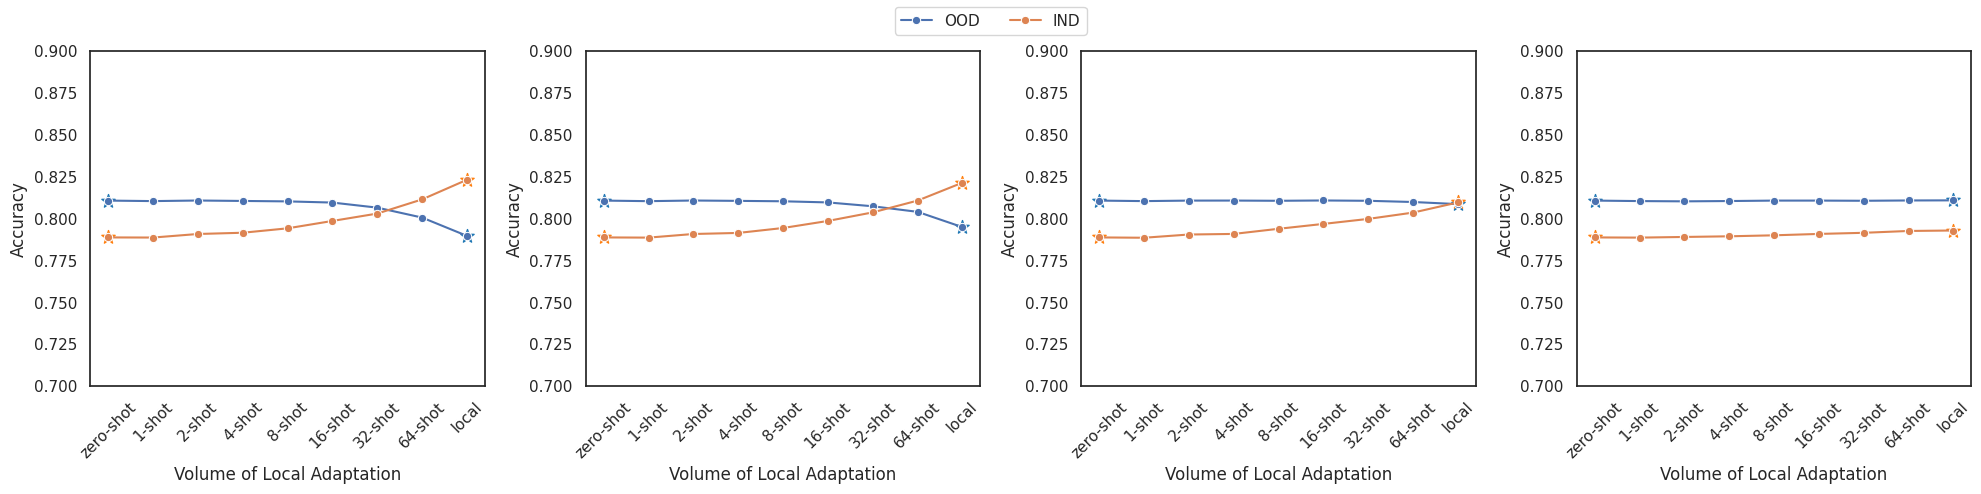

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_colors = sns.color_palette()
# 设置绘图风格
sns.set(style="white")

# 绘制线图
plt.figure(dpi=200)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sub = 50
fews = [1, 2, 4, 8, 16, 32, 64]
x_loc = [0, 1, 2, 3, 4, 5, 6]
kds = [0.0, 10.0, 100.0, 1000.0]
for i, kd in enumerate(kds):
    table_dict = {'x':[], 'x_label':[], 'ood': [], 'ind': []}
    # zero-shot
    file_name=f'./ours/ViT-B-32_data_sub{sub}.json'
    _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
    table_dict['x'].append(-1)
    table_dict['x_label'].append('zero-shot')
    table_dict['ood'].append(ood_acc)
    table_dict['ind'].append(ind_acc)

    for few, loc in zip(fews, x_loc):
        file_name=f'./ours/ViT-B-32_data_sub{sub}_fewshot_{few}_kd{kd}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
        table_dict['x'].append(loc)
        table_dict['x_label'].append(f'{few}-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

    # local
    file_name=f'./ours/ViT-B-32_data_sub{sub}_fewshot_full_kd{kd}.json'
    _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
    table_dict['x'].append(7)
    table_dict['x_label'].append('local')
    table_dict['ood'].append(ood_acc)
    table_dict['ind'].append(ind_acc)

    df = pd.DataFrame(table_dict)
    print(df)

    # 绘制中间点的线图
    sns.lineplot(data=df, x='x', y='ood', marker='o', label='OOD', ax=axes[i], legend=False)
    sns.lineplot(data=df, x='x', y='ind', marker='o', label='IND', ax=axes[i], legend=False)


    # 绘制特殊点
    axes[i].scatter(df['x'][0], df['ood'][0], color=default_colors[0], s=100, marker='*')
    axes[i].scatter(df['x'][0], df['ind'][0], color=default_colors[1], s=100, marker='*')
    axes[i].scatter(df['x'].iloc[-1], df['ood'].iloc[-1], color=default_colors[0], s=100, marker='*')
    axes[i].scatter(df['x'].iloc[-1], df['ind'].iloc[-1], color=default_colors[1], s=100, marker='*')

    # # 绘制水平线
    # axes[i].hlines(df['ood'][0], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[0], linestyles='dotted')
    # axes[i].hlines(df['ind'][0], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[1], linestyles='dotted')
    # axes[i].hlines(df['ood'].iloc[-1], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[0], linestyles='dotted')
    # axes[i].hlines(df['ind'].iloc[-1], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[1], linestyles='dotted')

    # 设置 x 轴标签
    axes[i].set_xticks(df['x'])
    axes[i].set_xticklabels(df['x_label'], rotation=45)

    # 设置其他图形元素
    axes[i].set_xlabel('Volume of Local Adaptation')
    axes[i].set_ylabel('Accuracy')

    # 设置ylim
    axes[i].set_ylim(0.7, 0.9)

# 添加图例到一个子图外部
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('local_adaptation_subset50.png')
# 显示图形
plt.show()


./ours/ViT-B-32_data_sub50.json
accuracy:
[[90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172]]
the total ood accuracy(by average):
0.8070273333333334
the total ood accuracy(by data number):
0.8106903142081875
the total ind accuracy(by average):
0.8070273333333333
the total ind accuracy(by data number):
0.7887046285736757
round:
0
times:
54.14024591445923
./ours/ViT-B-32_data_sub50_fewshot_1_kd0.0.json
accuracy:
[[90.7234, 82.2663, 92.673, 87.7643, 58.9467, 71.5649], [90.7786, 82.2946, 92.768, 87.7002, 59.0133, 71.374], [90.8338, 82.2663, 92.7137, 87.7643, 59.0533, 71.4218], [90.8338, 82.2663, 92.7408, 87.9564, 58.7867, 71.5172], [90.889, 82.2663, 92.768, 87.6361, 59.1067, 71.5172], [90.7786, 82.3229, 92.686

<Figure size 1280x960 with 0 Axes>

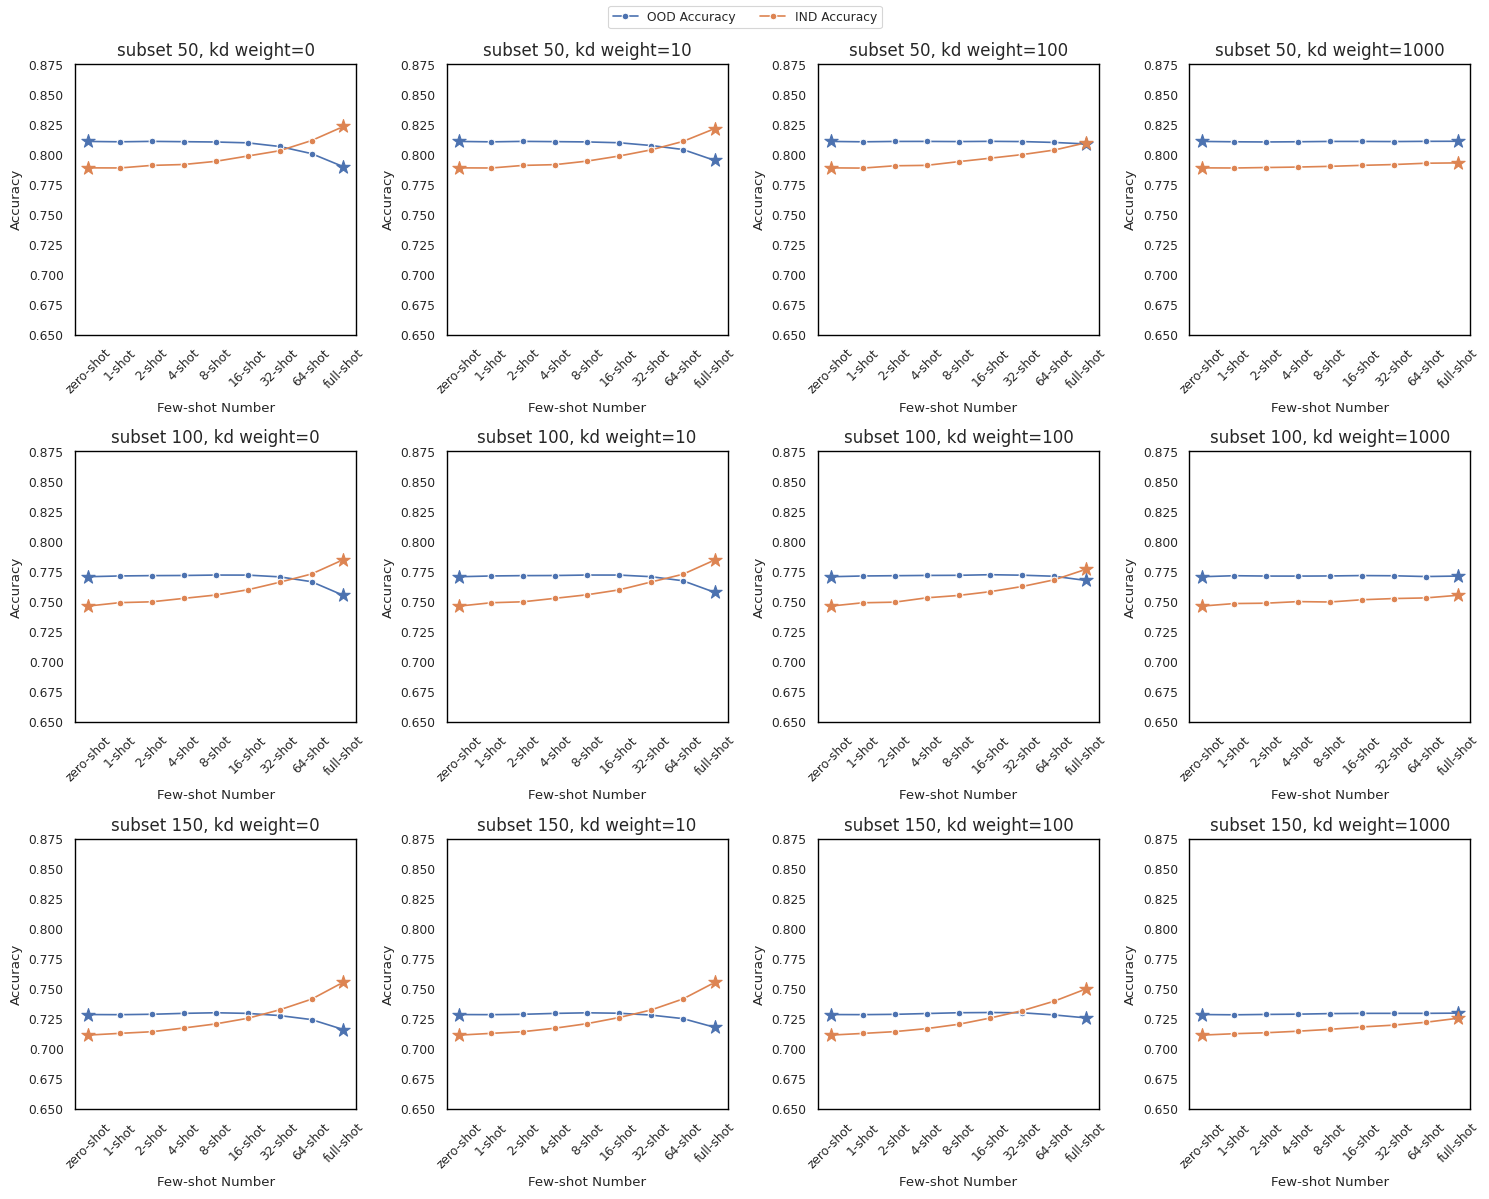

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_colors = sns.color_palette()
# 设置绘图风格
sns.set_theme(style="white", context="paper")
custom_style = {
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
}
# Updating matplotlib's rc settings with the custom style
plt.rcParams.update(custom_style)
# 绘制线图
plt.figure(dpi=200)
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

sub = [50, 100, 150]
fews = [1, 2, 4, 8, 16, 32, 64]
x_loc = [0, 1, 2, 3, 4, 5, 6]
kds = [0.0, 10.0, 100.0, 1000.0]
kds_title = [0, 10, 100, 1000]
for j in range(3):
    for i, kd in enumerate(kds):
        table_dict = {'x':[], 'x_label':[], 'ood': [], 'ind': []}
        # zero-shot
        file_name=f'./ours/ViT-B-32_data_sub{sub[j]}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
        table_dict['x'].append(-1)
        table_dict['x_label'].append('zero-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

        for few, loc in zip(fews, x_loc):
            file_name=f'./ours/ViT-B-32_data_sub{sub[j]}_fewshot_{few}_kd{kd}.json'
            _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
            table_dict['x'].append(loc)
            table_dict['x_label'].append(f'{few}-shot')
            table_dict['ood'].append(ood_acc)
            table_dict['ind'].append(ind_acc)

        # local
        file_name=f'./ours/ViT-B-32_data_sub{sub[j]}_fewshot_full_kd{kd}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
        table_dict['x'].append(7)
        table_dict['x_label'].append('full-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

        df = pd.DataFrame(table_dict)
        print(df)

        # 绘制中间点的线图
        sns.lineplot(data=df, x='x', y='ood', marker='o', label='OOD Accuracy', ax=axes[j, i], legend=False)
        sns.lineplot(data=df, x='x', y='ind', marker='o', label='IND Accuracy', ax=axes[j, i], legend=False)

        # 绘制特殊点
        axes[j, i].scatter(df['x'][0], df['ood'][0], color=default_colors[0], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'][0], df['ind'][0], color=default_colors[1], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'].iloc[-1], df['ood'].iloc[-1], color=default_colors[0], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'].iloc[-1], df['ind'].iloc[-1], color=default_colors[1], s=100, marker='*', zorder=5)



        # # 绘制水平线
        # axes[i].hlines(df['ood'][0], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[0], linestyles='dotted')
        # axes[i].hlines(df['ind'][0], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[1], linestyles='dotted')
        # axes[i].hlines(df['ood'].iloc[-1], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[0], linestyles='dotted')
        # axes[i].hlines(df['ind'].iloc[-1], xmin=df['x'][0], xmax=df['x'].iloc[-1], colors=default_colors[1], linestyles='dotted')

        # 设置 x 轴标签
        axes[j, i].set_xticks(df['x'])
        axes[j, i].set_xticklabels(df['x_label'], rotation=45)

        # 设置其他图形元素
        axes[j, i].set_title(f'subset {sub[j]}, kd weight={kds_title[i]}', fontsize=12)
        axes[j, i].set_xlabel('Few-shot Number')
        axes[j, i].set_ylabel('Accuracy')

        # 设置ylim
        axes[j, i].set_ylim(0.650, 0.875)

# 添加图例到一个子图外部
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.savefig('local_adaptation.pdf')
# 显示图形
plt.show()
